# Movie Analysis System
- In this system we will perform analysis and recommendation system based on similar generes and actors which user prefer.
- We will analyse profitability of the movies.
- Language based gross analysis.
- Comparison of Gross and Generes for different movies.
- Recommendation system based on actor, genere 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset
The dataset used is movie_metadata.csv. 

In [2]:
data=pd.read_csv("./movie_metadata.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Data Visualization and Exploration
**Analysing the Movie Dataset**

In [3]:
data.shape

(5043, 28)

In [4]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

Few of the columns like  director_facebook_likes, actor_3_facebook_likesetc are completely useless for our analysis process therefore, dropping these columns.

In [6]:
data.drop(['director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes','cast_total_facebook_likes',
        'facenumber_in_poster','actor_2_facebook_likes',
        'aspect_ratio','movie_imdb_link','color','plot_keywords','content_rating'],axis=1,inplace=True)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'country', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [7]:
#Finding the null values in the dataset
null_val=data.isnull().sum()
percent=(null_val/data.isnull().count())*100
missing=pd.concat([null_val,percent],axis=1,keys=['Total','Percentage %'])
print(missing)

                        Total  Percentage %
director_name             104      2.062265
num_critic_for_reviews     50      0.991473
duration                   15      0.297442
actor_2_name               13      0.257783
gross                     884     17.529248
genres                      0      0.000000
actor_1_name                7      0.138806
movie_title                 0      0.000000
num_voted_users             0      0.000000
actor_3_name               23      0.456078
num_user_for_reviews       21      0.416419
language                   12      0.237954
country                     5      0.099147
budget                    492      9.756098
title_year                108      2.141582
imdb_score                  0      0.000000
movie_facebook_likes        0      0.000000


gross and budget have more higher nan/null values than any other columns

In [8]:
#Removing the null values from gross and budget
data.dropna(subset=['gross','budget'],inplace=True)
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
country                    0
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [9]:
#num_critic_for_reviews and duration are numeric therefore the nan cvalue can be replaced by their respective means
data.num_critic_for_reviews.fillna(data["num_critic_for_reviews"].mean(),inplace=True)
data.duration.fillna(data.duration.mean(),inplace=True)

#actors name which are nan will be unpopulor actors
data['actor_1_name'].fillna("Unpopular/unknown Actors",inplace=True)
data['actor_2_name'].fillna("Unpopular/unknown Actors",inplace=True)
data['actor_3_name'].fillna("Unpopular/unknown Actors",inplace=True)

#language column nan can be replaced with the mode(The mode of a set of data values is the value that appears most often)
data['language'].fillna(data['language'].mode()[0],inplace=True)

In [10]:
data.isnull().sum().sum()

0

Now all the null values are removed from the dataset. 

#### Manipulating Language and Duration Column

In [11]:
#Findig the number of movies in different languages
data['language'].value_counts()

English       3710
French          37
Spanish         26
Mandarin        15
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Hebrew           3
Dutch            3
Persian          3
Thai             3
Danish           3
Indonesian       2
Aboriginal       2
Dari             2
Kazakh           1
Telugu           1
Russian          1
Arabic           1
Maya             1
Vietnamese       1
Hungarian        1
Filipino         1
Aramaic          1
Zulu             1
None             1
Bosnian          1
Romanian         1
Dzongkha         1
Mongolian        1
Czech            1
Icelandic        1
Swedish          1
Name: language, dtype: int64

In [12]:
#Defining a function for grouping the languages
def language(x):
    if x=='English':
        return "English"
    else:
        return 'Foreign'

In [13]:
data['language']=data['language'].apply(language)
data['language'].value_counts()

English    3710
Foreign     181
Name: language, dtype: int64

In [14]:
#Finding the duration of the movies 
data['duration'].value_counts()

101.000000    117
100.000000    111
98.000000     105
95.000000      98
90.000000      97
             ... 
65.000000       1
45.000000       1
37.000000       1
53.000000       1
109.896401      1
Name: duration, Length: 157, dtype: int64

In [15]:
def duration(x):
    if x<=120:
        return 'short'
    else:
        return 'long'

In [16]:
data['duration']=data['duration'].apply(duration)
data['duration'].value_counts()

short    2969
long      922
Name: duration, dtype: int64

### Top 10 Profitable Movies Of All Times
**HOW TO DEFINE THE PROFIT OF A MOVIE!!**<br>**Budget**: It is defined as the amount which producer spend to produce a movie.<br>**Gross**:It is an amount which producer earn by releasing their movie on theaters, OTT platforms, TV, etc.<br>**PROFIT**:GROSS-BUDGET

In [17]:
#Converting the budget to million dollar.
data['budget']/=1000000
data['gross']/=1000000

In [18]:
data['profit']=data['gross']-data['budget']

In [19]:
#Printing the top 10 movies
data[['profit','movie_title']].sort_values(by='profit',ascending=False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


The dataset contains duplicate values. Example, two avengers movie.

In [20]:
#Removing the duplicate values using dropduplicate()
data.drop_duplicates(subset=None,keep='first',inplace=True)

In [21]:
#Checking if the values are unique
data[['profit','movie_title']].sort_values(by='profit',ascending=False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight
439,329.999255,The Hunger Games


### Profit and Loss Analysis on English and Foreign Movies

In [22]:
data['title_year']=data['title_year'].astype('int')

In [23]:
print("Most profitable year on box office based on language")
data[['title_year','language','profit']].groupby(['language','title_year']).agg(sum).sort_values(by='profit',
                                                                                                 ascending=False).head(10)

Most profitable year on box office based on language


profit
language title_year             
English  2014        2729.797944
         2012        2701.504634
         2015        2364.554417
         2002        2268.274235
         2009        2133.449256
         2013        2080.782304
         2003        1924.411513
         2007        1754.855579
         2001        1666.701327
         1994        1600.413059

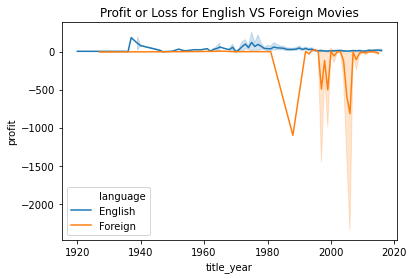

In [24]:
sns.lineplot(data['title_year'],data['profit'],hue=data['language'])
plt.title("Profit or Loss for English VS Foreign Movies")
plt.show()

We can see that the foreign movies were in huge losses between 1980 to 2010 whereas English Movies never went to losses overall.

### Gross Comparision of long and short movies

In [25]:
display(data[data['duration']=='long'][['movie_title','duration','profit']].sort_values(by='profit',ascending=False).head(5))
display(data[data['duration']=='short'][['movie_title','duration','profit']].sort_values(by='profit',ascending=False).head(5))

,movie_title,duration,profit
0,Avatar,long,523.505847
29,Jurassic World,long,502.177271
26,Titanic,long,458.672302
3024,Star Wars: Episode IV - A New Hope,long,449.935665
17,The Avengers,long,403.279547


,movie_title,duration,profit
3080,E.T. the Extra-Terrestrial,short,424.449459
509,The Lion King,short,377.783777
812,Deadpool,short,305.024263
521,Despicable Me 2,short,292.049635
338,Finding Nemo,short,286.838870


We can conclude that movies with longer duration have higher gross value.

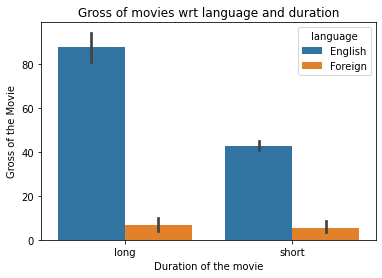

In [26]:
#Let's see the duration impact on the foreign movie's gross
sns.barplot(data['duration'],data['gross'],hue=data['language'])
plt.xlabel("Duration of the movie")
plt.ylabel("Gross of the Movie")
plt.title("Gross of movies wrt language and duration")
plt.show()

This shows that English movies with longer duration have higher gross whereas for foreign movies their is neglegible difference in the gross.

### Extracting Movie Genres
There are about 15 genres for movies like thriller, romance, comedy, suspence, sci-fy, action, drama, horror, etc. One movie can have more than one genre.

In [27]:
data['genres'].value_counts()

Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Animation|Family|Fantasy                    1
Animation|Biography|Drama|War               1
Biography|Crime|Drama|History               1
Action|Adventure|Comedy|Crime|Thriller      1
Adventure|Animation|Family|Musical          1
Name: genres, Length: 762, dtype: int64

In [28]:
data.genres.str.split('|')[9]

['Adventure', 'Family', 'Fantasy', 'Mystery']

In [29]:
#We can see that a movie have more than one genre let's keep first 4 genres
data['Movie_genres']=data['genres'].str.split('|')
data['genre1']=data['Movie_genres'].apply(lambda x: x[0])
data['genre2']=data['Movie_genres'].apply(lambda x:x[1] if len(x)>1 else x[0])
data['genre3']=data['Movie_genres'].apply(lambda x:x[2] if len(x)>2 else x[0])
data['genre4']=data['Movie_genres'].apply(lambda x:x[3] if len(x)>3 else x[0])
#If a movie don't have more than one genre than only the first genre is placed on all 4 of genres

In [30]:
data[['genres','genre1','genre2','genre3','genre4']].head()

,genres,genre1,genre2,genre3,genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


### Top 10 movies on Social Media

Social Media Popularity can be calculated by:
- Number of peple who voted for the movie.
- Number of people who reviewed the movie.
- Number of facebook likes for the movie.<br> This can be calculated by**(Number of peope who reviewed the movie/number of people who voted for the movie)*Number of Facebook likes**

In [31]:
data["SocialMediaPopularity"]=(data['num_user_for_reviews']/data['num_voted_users'])*data['movie_facebook_likes']
X=data[['movie_title','SocialMediaPopularity']].sort_values(by='SocialMediaPopularity',ascending=False).head(10)
print(X)

                              movie_title  SocialMediaPopularity
10    Batman v Superman: Dawn of Justice             1599.794424
150                         Ghostbusters             1076.336425
1582                        Ghostbusters             1075.827482
96                          Interstellar             1024.560802
3015               10 Days in a Madhouse              828.025478
945                       Into the Woods              692.937200
73                         Suicide Squad              652.816996
1190                Fifty Shades of Grey              624.306881
108                             Warcraft              622.790277
92          Independence Day: Resurgence              599.274128


Text(0.5, 1.0, '10 POPULAR MOVIES IN SOCIAL MEDIA')

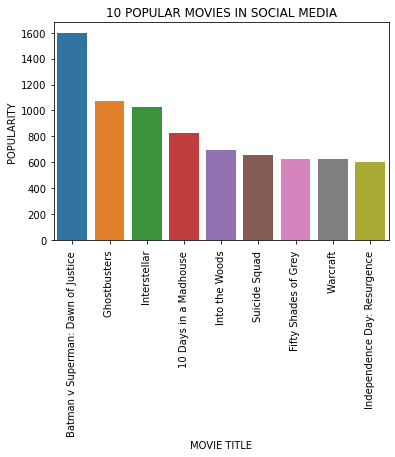

In [32]:
sns.barplot(X.movie_title,X.SocialMediaPopularity)
plt.xticks(rotation=90)
plt.xlabel("MOVIE TITLE")
plt.ylabel("POPULARITY")
plt.title("10 POPULAR MOVIES IN SOCIAL MEDIA")


### Associating IMBD rating and Duration

In [33]:
print("Average IMBD ratings for long duration movies: {}".format(data[data.duration=='long']['imdb_score'].mean()))
print("Average IMBD ratingsfor short duration movies: {}".format(data[data['duration']=='short']['imdb_score'].mean()))

Average IMBD ratings for long duration movies: 7.059432933478736
Average IMBD ratingsfor short duration movies: 6.278087784960868


Although there is not much difference in the rating still the longer duration movies have better chances for getting the higher ratings

In [34]:
print("Highest long duration rated movie: ")
display(data[data['duration']=='long'][['movie_title','imdb_score']].sort_values(by='imdb_score',ascending=False).head(1))
print("Highest short duration rated movies: ")
display(data[data['duration']=='short'][['movie_title','imdb_score']].sort_values(by='imdb_score',ascending=False).head(1))

Highest long duration rated movie: 


,movie_title,imdb_score
1937,The Shawshank Redemption,9.3


Highest short duration rated movies: 


,movie_title,imdb_score
3592,The Usual Suspects,8.6


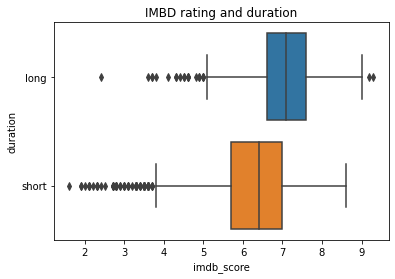

In [35]:
sns.boxplot(data['imdb_score'],data['duration'])
plt.title("IMBD rating and duration")
plt.show()

Long Duration have higher IMBD rating than duration.

### Comparing Critically Acclaimed Actors

In [36]:
def actors(x):
    a=data[data['actor_1_name']==x]
    b=data[data['actor_2_name']==x]
    c=data[data['actor_3_name']==x]
    x=a.append(b)
    y=x.append(c)
    
    y=y[['movie_title','budget','gross','title_year','genres','language','imdb_score']]
    return y

In [37]:
actors("Meryl Streep")

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


In [38]:
def critically_acclaimed_actors(x):
    a=data[data['actor_1_name']==x]
    b=data[data['actor_2_name']==x]
    c=data[data['actor_3_name']==x]
    x=a.append(b)
    y=x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')

In [39]:
print('number of critics review for:Brad Pitt\n{}'.format(critically_acclaimed_actors('Brad Pitt')))
print('number of critics review for:Leonardo DiCaprio\n{}'.format(critically_acclaimed_actors('Leonardo DiCaprio')))
print('number of critics review for:Tom Cruise\n{}'.format(critically_acclaimed_actors('Tom Cruise')))

number of critics review for:Brad Pitt
7814
number of critics review for:Leonardo DiCaprio
7014
number of critics review for:Tom Cruise
6740


## Recommending Movies Based on Languages and Actors

In [40]:
#Recommendation based on language
def recommend_movie_language(x):
    y=data[['language','movie_title','imdb_score']][data['language']==x]
    y=y.sort_values(by='imdb_score',ascending=False)
    return y.head(15)

In [41]:
recommend_movie_language('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


In [42]:
#recommendation based on Actors
def recommendation_actor(x):
    a=data[['movie_title','imdb_score']][data['actor_1_name']==x]
    b=data[['movie_title','imdb_score']][data['actor_2_name']==x]
    c=data[['movie_title','imdb_score']][data['actor_3_name']==x]
    x=a.append(b)
    y=x.append(c)
    y=y.sort_values(by='imdb_score',ascending=False)
    return y.head(15)
    

In [43]:
recommendation_actor("Leonardo DiCaprio")

,movie_title,imdb_score
97,Inception,8.8
361,The Departed,8.5
296,Django Unchained,8.5
308,The Wolf of Wall Street,8.2
179,The Revenant,8.1
452,Shutter Island,8.1
911,Catch Me If You Can,8.0
307,Blood Diamond,8.0
3058,What's Eating Gilbert Grape,7.8
26,Titanic,7.7


## Recommending Similar Genres

In [44]:
from mlxtend.preprocessing import TransactionEncoder

TransactionalEncoder we can transform the dataset to array format suitable for machine learning. Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array:

In [45]:
x=data['genres'].str.split('|')
te=TransactionEncoder()
x=te.fit_transform(x)
x=pd.DataFrame(x,columns=te.columns_)

x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


If you see True that means movie belong to the genres else not

In [46]:
#converting these boolean values to integer values
genres=x.astype('int')

In [47]:
genres.insert(0,'movie_title',data['movie_title'])
genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [98]:
def recom_genre(gen):
    gen=genres[gen]
    similar_genres=genres.corrwith(gen)
    similar_genres=similar_genres.sort_values(ascending=False)
    similar_genres=similar_genres.iloc[1:]
    return similar_genres.head(3)

In [99]:
recom_genre("Comedy")

Family       0.228683
Romance      0.180475
Animation    0.174099
dtype: float64